['ID', 'time_interval_s', 'experience_key', 'time_elapsed', 'TemperatureChamber_0_Celsius', 'TemperatureChamber_1_Celsius', 'TemperatureChamber_2_Celsius', 'TemperatureChamber_3_Celsius', 'TemperatureChamber_4_Celsius', 'TemperatureChamber_5_Celsius', 'TemperatureChamber_6_Celsius', 'TemperatureChamber_7_Celsius', 'TemperatureChamber_8_Celsius', 'C12_a_Celsius', 'C12_c_Celsius', 'C12_f_Celsius', 'C12_j_Celsius', 'C12_k_Celsius', 'C12_l_Celsius', 'C12_m_Celsius', 'C12_n_Celsius', 'C12_o_Celsius', 'C12_p_Celsius', 'C12_temperature_diamond_Celsius', 'C12_q_Celsius', 'C12_s_Volt', 'C12_t_Volt', 'C12_u_Volt', 'C12_v_Volt', 'C12_x_Volt', 'C12_y_mA', 'C12_z_Volt', 'C12_A_Volt', 'C12_B_Volt', 'C12_C_Volt', 'C12_D_Celsius', 'C12_E_Volt', 'C12_F_Volt', 'C12_G_mA', 'C12_current_controller_3v3_pll_mA', 'C12_current_controller_3v3_mA', 'C12_current_controller_5v5_detection_mA', 'C12_voltage_controller_3v3_pll_Volt', 'C12_voltage_controller_3v3_Volt', 'C12_voltage_controller_5v5_detection_Volt', 'to

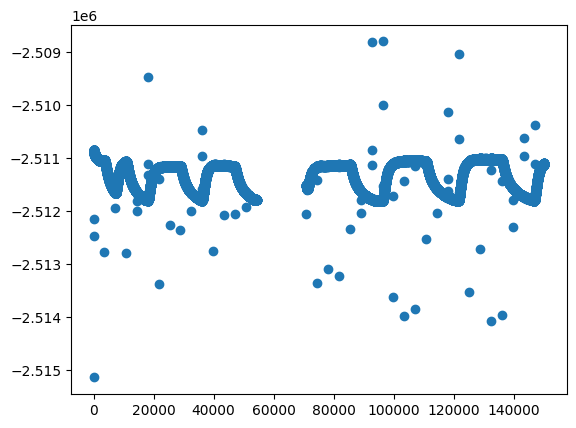

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data_participant.csv')
columns = df.columns.tolist()
print(columns)

plt.scatter(df['time_interval_s'], df['C12_magnetometer_Bx'])
# plt.scatter(df['time_interval_s'], df['C12_magnetometer_By'])
# plt.scatter(df['time_interval_s'], df['C12_magnetometer_Bz'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Create some sample data
# Each row is a sample, each column is a feature (independent variable)
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15]
])
# y is the dependent variable
y = np.array([2, 3, 4, 5, 6])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Display the coefficients for each feature
print("Coefficients:", model.coef_)

# Display the intercept
print("Intercept:", model.intercept_)

# Display the predictions
print("Predictions:", y_pred)

Coefficients: [0.11111111 0.11111111 0.11111111]
Intercept: 1.3333333333333335
Predictions: [3.]


linear regression model which independent columns to choose?
feature selection

regularized penalized loss/cost term

Filter (correlation), Wrapper (ML model), Embedded (Loss, regularization)

In [20]:
x= df.drop('experience_key',axis=1)
x

,ID,time_interval_s,time_elapsed,TemperatureChamber_0_Celsius,TemperatureChamber_1_Celsius,TemperatureChamber_2_Celsius,TemperatureChamber_3_Celsius,TemperatureChamber_4_Celsius,TemperatureChamber_5_Celsius,TemperatureChamber_6_Celsius,...,C12_current_controller_5v5_detection_mA,C12_voltage_controller_3v3_pll_Volt,C12_voltage_controller_3v3_Volt,C12_voltage_controller_5v5_detection_Volt,total_time_elapsed_s,timestamp_start,C12_magnetometer_Bx,C12_magnetometer_By,C12_magnetometer_Bz,C12_magnetometer_Bnorm
0,3,3,3.495942,17.5325,17.6350,19.6925,15.4825,15.5300,20.6875,21.2100,...,NaN,NaN,NaN,NaN,3.0000,1676581691,-2512471.250,1229968.125,-107012.3750,2799425.837
1,4,4,4.448050,17.3875,17.7575,19.9775,15.8825,15.4275,20.7000,20.9725,...,NaN,NaN,NaN,NaN,4.0000,1676581692,-2515132.850,1229105.550,-107148.9281,2801441.522
2,5,5,5.424648,17.2725,17.8150,19.8125,15.4475,15.0275,20.4575,20.6225,...,70.487808,3.272,3.344,5.528,5.0000,1676581693,-2512140.000,1230410.025,-106566.7906,2799305.751
3,6,6,6.427434,17.3425,17.6900,19.9150,15.4475,15.2400,20.4700,21.2600,...,NaN,NaN,NaN,NaN,6.0000,1676581694,-2510852.850,1230520.400,-107043.1875,2798217.421
4,7,7,7.431471,17.2925,17.7600,19.7975,15.4800,15.3475,20.6300,20.8950,...,NaN,NaN,NaN,NaN,7.0000,1676581695,-2510852.125,1230521.458,-107043.3789,2798217.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169093,186751,186751,3600.541400,17.8100,16.9100,17.0000,16.9100,16.9800,17.3300,19.5600,...,NaN,NaN,NaN,NaN,186751.0559,1676768439,NaN,NaN,NaN,NaN
169094,186752,186752,3601.620279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,186752.0099,1676768440,NaN,NaN,NaN,NaN
169095,186753,186753,3602.652154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,186753.1539,1676768441,NaN,NaN,NaN,NaN
169096,186754,186754,3603.468600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.292686,3.280,3.344,5.528,186754.0639,1676768442,NaN,NaN,NaN,NaN


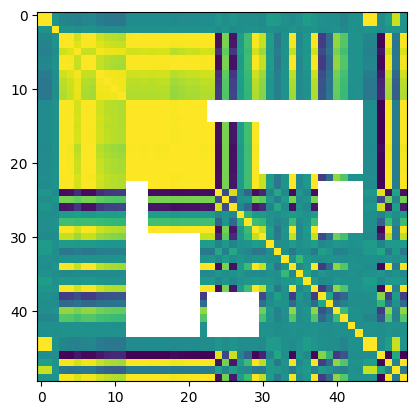

In [24]:
cor = x.corr()
plt.imshow(cor)

In [33]:
cor_target = abs(cor['C12_magnetometer_Bx'])
relevant_features = cor[cor_target>0.5]
cor_target.sort_values(ascending=False)
# relevant_features

C12_magnetometer_Bx                          1.000000
C12_magnetometer_Bnorm                       0.998978
C12_f_Celsius                                0.988667
C12_temperature_diamond_Celsius              0.988296
C12_k_Celsius                                0.987072
C12_l_Celsius                                0.987067
C12_a_Celsius                                0.986073
C12_j_Celsius                                0.984552
C12_c_Celsius                                0.984223
C12_q_Celsius                                0.980364
C12_o_Celsius                                0.977334
TemperatureChamber_1_Celsius                 0.976292
C12_p_Celsius                                0.976175
C12_G_mA                                     0.974172
C12_magnetometer_By                          0.973277
TemperatureChamber_0_Celsius                 0.969472
C12_y_mA                                     0.967542
C12_n_Celsius                                0.964235
C12_D_Celsius               

Multiple dependent variables
multivariate linear regression

"you should actually check for correlations among the residuals in your multiple models, rather than for correlations among the dependent variables as such. The fact that the latter are correlated by itself tells you nothing about whether your estimates will improve by modelling them jointly."


linear algebra dependent, independent, invertible

"A reasonable possibility is to make a Principal Component Analysis (PCA) of the 𝑞
 dependent variables 𝑌𝑖
 and construct other 𝑞
 independent variables as linear combinations:
𝑌̃ 𝑖=𝜆𝑖,1𝑌1+…𝜆𝑖,𝑞𝑌𝑞
Then, try to correleate each 𝑌̃ 𝑖
 with the 𝑝
 𝑋𝑖
. Thus, you can select the significant coefficients, eliminating non-significant effects. Finally you have:"

In [50]:
model = LinearRegression()
X = df[['C12_f_Celsius',
'C12_temperature_diamond_Celsius',
'C12_k_Celsius',
'C12_l_Celsius',
'C12_a_Celsius',
'C12_j_Celsius',
'C12_c_Celsius',
'C12_q_Celsius',
'C12_o_Celsius']]
Y = df[['C12_magnetometer_Bx','C12_magnetometer_By','C12_magnetometer_Bz']]
# Y = df[['C12_magnetometer_Bx']]

# Clean - FILL IN NANs with imputation
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

#X
imp.fit(X)
SimpleImputer()
X=imp.transform(X)

#Y
imp.fit(Y)
SimpleImputer()
Y=imp.transform(Y)


# Fit model
model.fit(X, Y)

model.predict([[3,4,5,5,5,5,5,5,5]])

array([[-2510191.79164713,  1230269.94556276,  -107043.2466301 ]])

https://scikit-learn.org/stable/modules/impute.html#impute
'missing value' vs 'sparse matrix'


dimension, linearly independent


cest quoi linear layer
nn.lienar

forward?